In [1]:
import PIL
import fitz
import pandas as pd 
from PIL import Image
import io
import re

In [3]:
doc = fitz.open('Data/Pathfinder_Bestiary_1.pdf') # importando o aqui de PDF


# Tratamenteo para pegar imagem

In [4]:
page_image = doc[16]  # salvando a pagina [numero da pagina] como page

In [5]:
list_image = page_image.getImageList() #  lista de imagens da pagina escolhida
list_image

Deprecation: 'getImageList' removed from class 'Page' after v1.19 - use 'get_images'.


[(1609, 1624, 780, 432, 8, 'ICCBased', '', 'Im0', 'DCTDecode'),
 (1607, 7122, 52, 51, 8, 'ICCBased', '', 'Im1', 'DCTDecode'),
 (1608, 7121, 52, 51, 8, 'ICCBased', '', 'Im2', 'DCTDecode'),
 (1606, 7120, 52, 51, 8, 'ICCBased', '', 'Im3', 'DCTDecode'),
 (1864, 0, 1226, 1603, 8, 'ICCBased', '', 'Im0', 'DCTDecode'),
 (1415, 7095, 216, 60, 8, 'ICCBased', '', 'Im0', 'DCTDecode')]

In [6]:
for item in list_image:    # for para pegar a imagem pelo tamanho   , se o quarto parametro da imagem for 1603 é a imagem da pagina toda. 
    if item[3] >100 and item[3] != 1603:
         img_creature = item

In [7]:
imagem_isolada = doc.extract_image(img_creature[0])['image']  # extratindo a imagem


In [8]:
Imagem_pronta = PIL.Image.open(io.BytesIO(imagem_isolada)) # printando a imagem

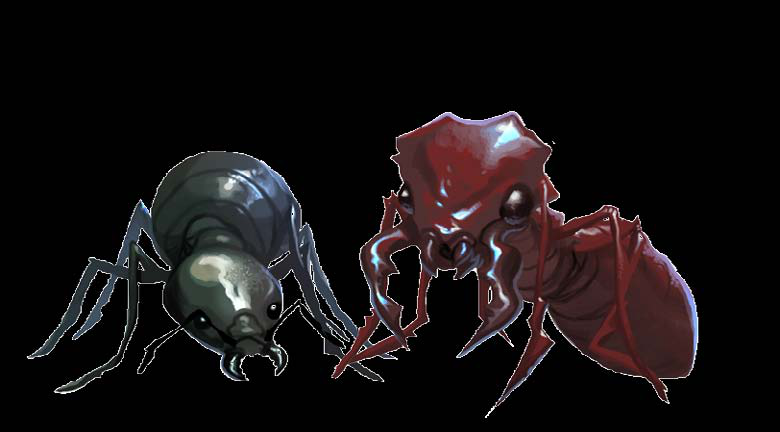

In [9]:
Imagem_pronta

# Tratamento para pegar nome do monstro

In [335]:
page_text = doc[17]  # salvando a pagina [numero da pagina] como page  OBS: a paniga 0  esta com 

words = page_text.get_text("words")  # extraindo todas as palavras da pagina 1

In [346]:
lista_nomes = []

for i in words:   # for para pegar o nomes do monstro na pagina. So funciona se o nome estiver com o segundo valor de 135.28799438476562
    for image in i:
        if image == 135.28799438476562:
                x = i[4]
                lista_nomes.append(x+' ')
                
                
                
teste_lista_nomes =''.join(lista_nomes)                

teste_lista_nomes = re.findall('.*?\d+',teste_lista_nomes )




In [347]:
teste_lista_nomes

['gORILLA CR 2', ' DIRE APE (gIgAnTOPIThECUS) CR 3']

In [319]:
teste_lista_nomes

'SOLAR CR 23 '

In [334]:
words  # todos os monstros tem o nome e CR quando o segundo numero está em 135.28799438476562   pelo que vi e o unico que tem nesta altura

[(561.6531372070312,
  526.6473388671875,
  572.3036499023438,
  566.4953002929688,
  'Illustration',
  0,
  0,
  0),
 (561.6531372070312,
  568.7903442382812,
  572.3036499023438,
  576.7548217773438,
  'by',
  0,
  0,
  1),
 (561.6531372070312,
  579.0498657226562,
  572.3036499023438,
  599.9598999023438,
  'Adam',
  0,
  0,
  2),
 (561.6531372070312,
  602.2548828125,
  572.3036499023438,
  624.8648681640625,
  'Vehige',
  0,
  0,
  3),
 (76.0,
  135.28799438476562,
  110.9020004272461,
  146.56500244140625,
  'gORILLA',
  1,
  0,
  0),
 (192.43299865722656,
  135.28799438476562,
  203.25099182128906,
  146.56500244140625,
  'CR',
  1,
  1,
  0),
 (205.50099182128906,
  135.28799438476562,
  210.00099182128906,
  146.56500244140625,
  '2',
  1,
  1,
  1),
 (72.0,
  146.32000732421875,
  83.06999969482422,
  158.85000610351562,
  'XP',
  2,
  0,
  0),
 (85.56999969482422,
  146.32000732421875,
  101.19000244140625,
  158.85000610351562,
  '600',
  2,
  0,
  1),
 (72.0,
  159.7720031